In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb


In [2]:
mydata=pd.read_csv(r'Bmi_male_female.csv')

In [3]:
mydata.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [4]:
mydata["Index"]=mydata["Index"].map({0:"Extremely Weak",1:"Weak",2:"Normal",3:"Overweight",4:"Obesity",5:"Extreme Obesity"})

In [5]:
mydata["Gender"].value_counts()

Female    255
Male      245
Name: Gender, dtype: int64

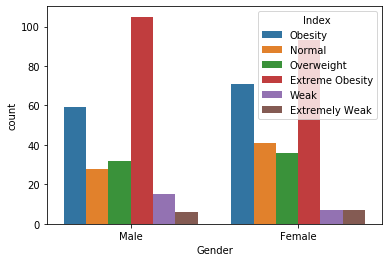

In [6]:
sb.countplot("Gender", data=mydata, hue="Index")
plt.show()

In [7]:
x_feature=mydata.iloc[:,:3]
y_target=mydata.iloc[:,3]

In [8]:
x_feature.Gender=x_feature.Gender.map({"Male":0, "Female":1})

In [9]:
x_feature.head()

,Gender,Height,Weight
0,0,174,96
1,0,189,87
2,1,185,110
3,1,195,104
4,0,149,61


In [10]:
x_array=x_feature.values
y_array=y_target.values

In [11]:
Nper_training=int(len(x_array)*.70)

In [12]:
x_train=x_array[:Nper_training]
x_test=x_array[Nper_training:]
y_train=y_array[:Nper_training]
y_test=y_array[Nper_training:]

In [13]:
split_table=pd.DataFrame({"Sample":[len(x_train),len(x_test),len(y_train),len(y_test)]},index=["x_train","x_test","y_train","y_test"])

In [14]:
split_table

,Sample
x_train,350
x_test,150
y_train,350
y_test,150


In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
trainer=KNeighborsClassifier(n_neighbors=5)
learner=trainer.fit(x_train,y_train)

In [23]:
import pickle 

In [20]:
with open("model.pkl", 'wb') as f:
    pickle.dump(learner, f)

In [24]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[0, 300, 500]]))

['Extreme Obesity']


In [25]:
out=model.predict([[0,165,65]])

In [26]:
out

array(['Overweight'], dtype=object)

In [29]:
string_out=""

In [30]:
string_out.join(out)

'Overweight'

In [31]:
type(string_out)

str